# Breast Cancer Survival Prediction with Machine Learning

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [93]:
df=pd.read_csv("BRCA.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
df.shape

(334, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [7]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [94]:
data = df.copy()

In [95]:
data = data.dropna()

I have removed the rows with null values in the 'DateofLast_Visit' column (17 null values) and the 'Patient_Status' column (13 null values) since these represent a minimal number compared to the entire dataset.

In [69]:
data.shape

(317, 16)

Breast cancer is mostly found in females, so let’s have a look at the Gender column to see how many females and males

In [14]:
data["Gender"].value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

Exactly as we thought, only four men have been diagnosed with breast cancer, and the rest are women.

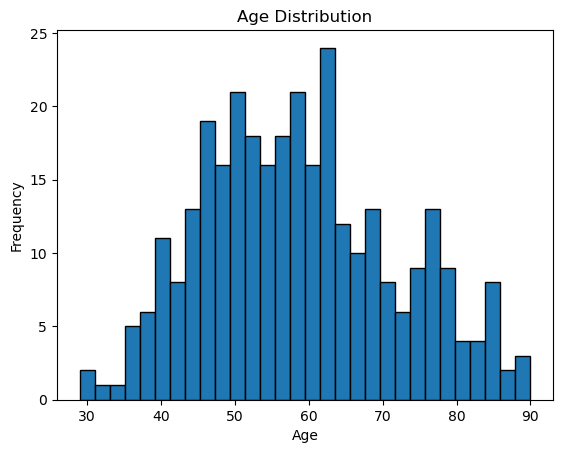

In [184]:
plt.hist(data["Age"],bins=30,edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()


The distribution of age appears to be approximately normal but exhibits a slight positive skewness

*  Now let’s have a look at the stage of tumour of the patients

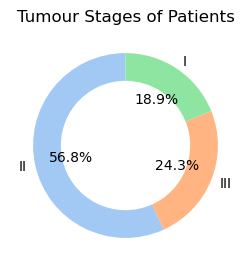

In [35]:
stage_counts = data['Tumour_Stage'].value_counts()
labels = stage_counts.index
sizes = stage_counts.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=90, wedgeprops=dict(width=0.3), 
        colors=sns.color_palette('pastel'))
plt.title('Tumour Stages of Patients')
 
plt.show()


Most of the patients in our dataset have cancer in the second stage.

#histology 
* Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread.

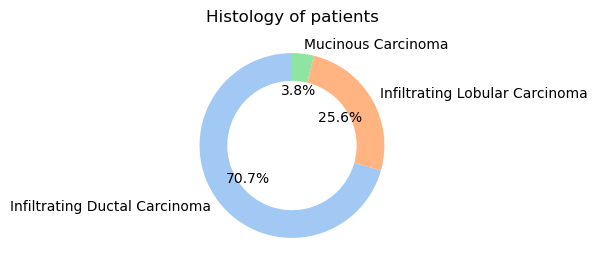

In [37]:
histology = data["Histology"].value_counts()
labels=histology.index
sizes=histology.values
plt.figure(figsize=(3,3))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle = 90,
        wedgeprops=dict(width =0.3),colors=sns.color_palette('pastel'))
plt.title("Histology of patients")
plt.show()

Over 70% of the people in our dataset have infiltrating ductal carcinoma.

In [40]:
print(data['ER status'].value_counts())
print(data['PR status'].value_counts())             
print(data['HER2 status'].value_counts()) 

ER status
Positive    317
Name: count, dtype: int64
PR status
Positive    317
Name: count, dtype: int64
HER2 status
Negative    288
Positive     29
Name: count, dtype: int64


In [ ]:
# ER - Estrogen Receptor 
# PR - Progesterone Receptor
# HER2 - Human Epidermal Growth Factor Receptor 2

A HER2 positivity score of 29 suggests a high expression level, indicating the potential for a more aggressive form of breast cancer.


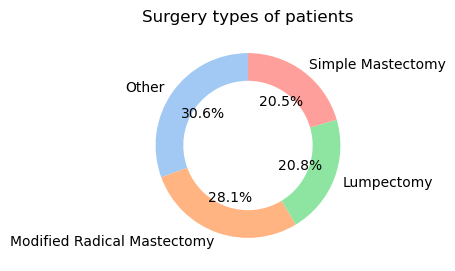

In [43]:
surgery_type=data["Surgery_type"].value_counts()
sizes=surgery_type.values
labels=surgery_type.index
plt.figure(figsize=(3,3))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle = 90,
        wedgeprops=dict(width = 0.3),colors=sns.color_palette('pastel'))
plt.title("Surgery types of patients")
plt.show()

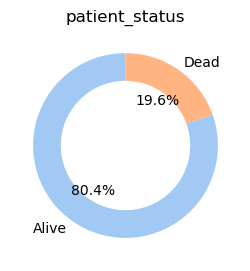

In [48]:
patient_status = data['Patient_Status'].value_counts()
sizes=patient_status.values
labels=patient_status.index
plt.figure(figsize=(3,3))
plt.pie(sizes,labels=labels,startangle=90,autopct="%1.1f%%",
        wedgeprops=dict(width=0.3),colors=sns.color_palette('pastel'))
plt.title("patient_status")
plt.show()

To train the model effectively, the predominantly categorical data needs to be converted into numerical format

In [81]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [96]:
data=data.drop(data[["Patient_ID","Date_of_Surgery","Date_of_Last_Visit"]],axis = 1)

In [97]:
catcols=data.select_dtypes(include='O').columns
catcols

Index(['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Patient_Status'],
      dtype='object')

In [98]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype='int')
oe.fit(data[catcols])


OrdinalEncoder(dtype='int')

In [99]:
data[catcols]=oe.transform(data[catcols])
data[catcols]

,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,0,2,0,0,0,0,1,0
1,0,1,2,0,0,0,0,1
2,0,2,0,0,0,0,2,0
3,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
329,0,2,0,0,0,1,3,1
330,1,1,1,0,0,0,2,1
331,0,1,0,0,0,0,0,1
332,0,0,0,0,0,1,0,1


In [100]:
oe.categories_

[array(['FEMALE', 'MALE'], dtype=object),
 array(['I', 'II', 'III'], dtype=object),
 array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
        'Mucinous Carcinoma'], dtype=object),
 array(['Positive'], dtype=object),
 array(['Positive'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Lumpectomy', 'Modified Radical Mastectomy', 'Other',
        'Simple Mastectomy'], dtype=object),
 array(['Alive', 'Dead'], dtype=object)]

In [169]:
y=data["Patient_Status"]
X=data.drop(columns="Patient_Status")

In [170]:
# to split the model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=666,stratify=y)


In [171]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=200)
model1.fit(X_train,y_train)


LogisticRegression(max_iter=200)

In [172]:
model1.score(X_test,y_test)

0.8125

In [185]:
#prdiction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

[0]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


 As the use of data in healthcare is very common today, we can use machine learning to predict whether a patient will survive a deadly disease like breast cancer or not.